In [5]:
import json
import os
import time
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials

In [3]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''


def load_config(config_path='../config.json'):
    with open(config_path, 'r') as config_file:
        config = json.load(config_file)
    return config


config = load_config()
subscription_key = config['subscription_key']
endpoint = config['endpoint']
#
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

Se recunoaste textul din imaginea: images/test2.jpeg
Recunoasterea completa a textului in proces ... 

Operatie Efectuata cu Succes!
Line text: Lucces in resolvarea
 Word: Lucces (Confidence:  0.20)
 Word: in (Confidence:  0.94)
 Word: resolvarea (Confidence:  0.80)
Line text: TEMELOR la
 Word: TEMELOR (Confidence:  0.80)
 Word: la (Confidence:  1.00)
Line text: LABORA toarele de
 Word: LABORA (Confidence:  0.99)
 Word: toarele (Confidence:  0.94)
 Word: de (Confidence:  1.00)
Line text: Inteligenta Artificialà!
 Word: Inteligenta (Confidence:  0.88)
 Word: Artificialà! (Confidence:  0.70)


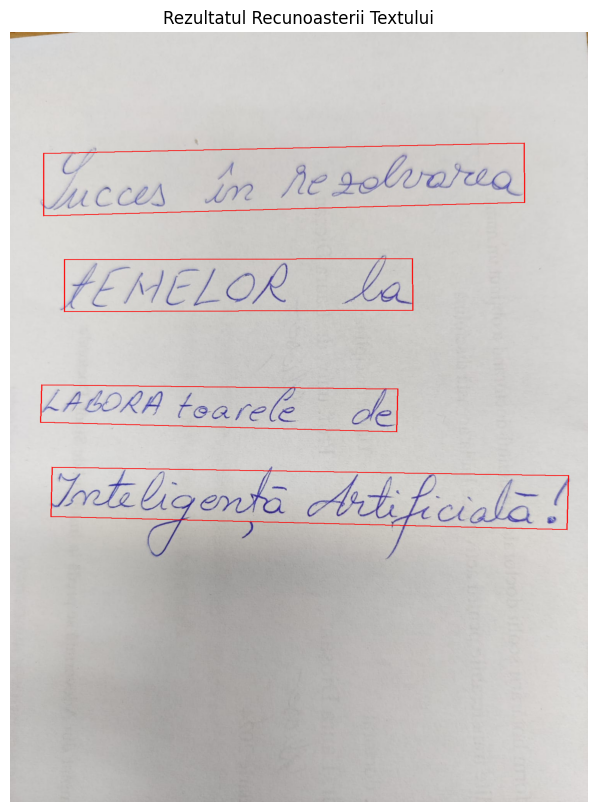


Rezultatul Complet:
Lucces in resolvarea
TEMELOR la
LABORA toarele de
Inteligenta Artificialà!

--------------------------------------------------
Se recunoaste textul din imaginea: images/i-love-god1.jpg
Recunoasterea completa a textului in proces ... 

Operatie Efectuata cu Succes!
Line text: I love God
 Word: I (Confidence:  1.00)
 Word: love (Confidence:  0.99)
 Word: God (Confidence:  0.99)
Line text: I am proud to say that.
 Word: I (Confidence:  0.88)
 Word: am (Confidence:  1.00)
 Word: proud (Confidence:  1.00)
 Word: to (Confidence:  1.00)
 Word: say (Confidence:  1.00)
 Word: that. (Confidence:  0.99)


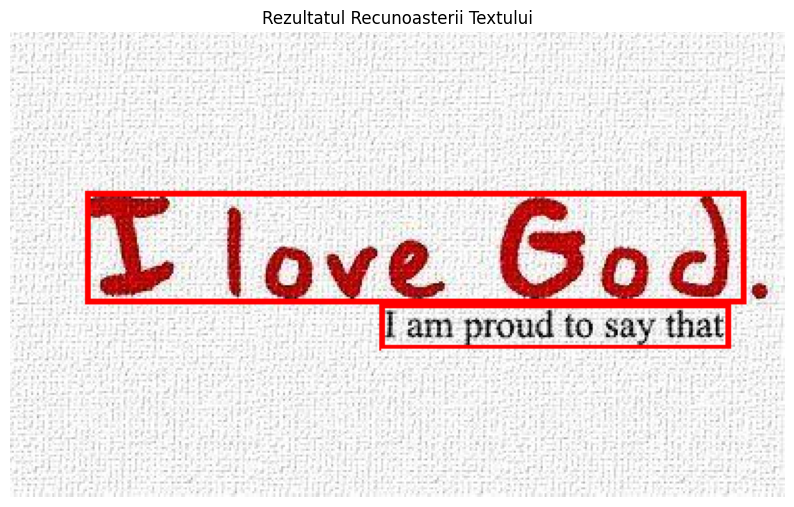


Rezultatul Complet:
I love God
I am proud to say that.

--------------------------------------------------


In [7]:
def recognize_text(image_path):
    print(f"Se recunoaste textul din imaginea: {image_path}")

    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    image_stream = BytesIO(image_data)

    recognize_results = computervision_client.read_in_stream(
        image=image_stream,
        raw=True
    )

    operation_location = recognize_results.headers["Operation-Location"]
    operation_id = operation_location.split("/")[-1]

    while True:
        results = computervision_client.get_read_result(operation_id)
        if results.status not in [OperationStatusCodes.running, OperationStatusCodes.not_started]:
            break
        print("Recunoasterea completa a textului in proces ... ")
        time.sleep(1)

    if results.status == OperationStatusCodes.succeeded:
        print("\nOperatie Efectuata cu Succes!")

        img = Image.open(image_path)

        draw_img = img
        draw = ImageDraw.Draw(draw_img)

        all_text = ""
        for read_result in results.analyze_result.read_results:
            for line in read_result.lines:

                print(f"Line text: {line.text}")
                all_text += line.text + "\n"

                try:
                    if hasattr(line.bounding_box[0], 'x') and hasattr(line.bounding_box[0], 'y'):
                        points = [(p.x, p.y) for p in line.bounding_box]
                    else:
                        points = []
                        for i in range(0, len(line.bounding_box), 2):
                            if i + 1 < len(line.bounding_box):
                                points.append((line.bounding_box[i], line.bounding_box[i + 1]))

                    if points:
                        draw.polygon(points, outline='red', width=3)
                except Exception as e:
                    print(f"Atentie: Nu sa putut crea un bounding box : {e}")

                for word in line.words:
                    try:
                        confidence = word.confidence
                        print(f" Word: {word.text} (Confidence: {confidence: .2f})")
                    except AttributeError:
                        print(f" Word: {word.text} (Confidence: N/A")

        plt.figure(figsize=(10, 10))
        plt.imshow(draw_img)
        plt.axis('off')
        plt.title("Rezultatul Recunoasterii Textului")
        plt.show()

        return all_text
    else:
        print(f"Recunoasterea Textului a esuat cu statusul : {results.status}")
        return None


image_paths = ["images/test2.jpeg", "images/i-love-god1.jpg"]
for image_path in image_paths:
    recognized_text = recognize_text(image_path)
    print(f"\nRezultatul Complet:\n{recognized_text}")
    print("-" * 50)



Se recunoaste textul din imaginea: images/test1.png
Recunoasterea completa a textului in proces ... 

Operatie Efectuata cu Succes!
Line text: Google Cloud
 Word: Google (Confidence:  0.62)
 Word: Cloud (Confidence:  0.86)
Line text: Platform
 Word: Platform (Confidence:  0.75)


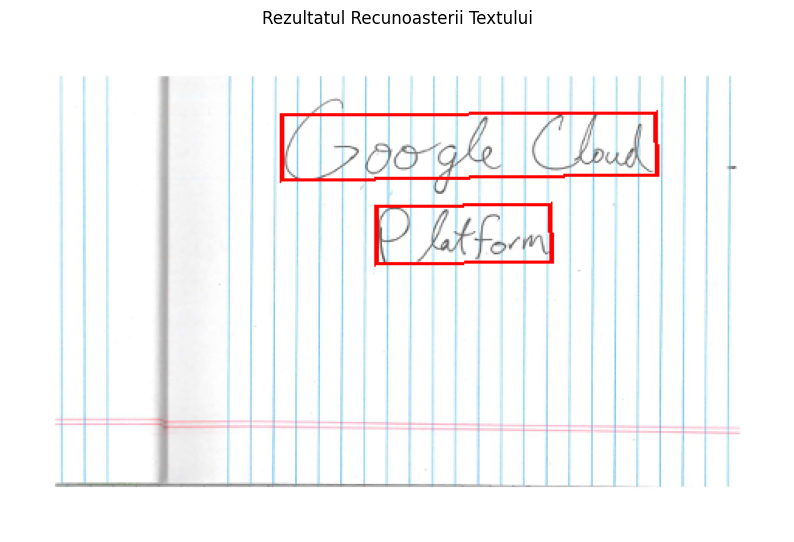


Rezultatul Complet: 
Google Cloud
Platform

--------------------------------------------------
Se recunoaste textul din imaginea: images/bad_writing.png
Recunoasterea completa a textului in proces ... 
Recunoasterea completa a textului in proces ... 

Operatie Efectuata cu Succes!
Line text: In mid-april Anglesey
 Word: In (Confidence:  1.00)
 Word: mid-april (Confidence:  0.92)
 Word: Anglesey (Confidence:  0.95)
Line text: moved his family and
 Word: moved (Confidence:  0.66)
 Word: his (Confidence:  1.00)
 Word: family (Confidence:  0.98)
 Word: and (Confidence:  1.00)
Line text: entourage from Rome to Naples,
 Word: entourage (Confidence:  0.89)
 Word: from (Confidence:  0.97)
 Word: Rome (Confidence:  0.84)
 Word: to (Confidence:  0.93)
 Word: Naples, (Confidence:  0.63)
Line text: there to a wait the arrival of
 Word: there (Confidence:  0.86)
 Word: to (Confidence:  1.00)
 Word: a (Confidence:  0.96)
 Word: wait (Confidence:  0.98)
 Word: the (Confidence:  0.99)
 Word: arrival 

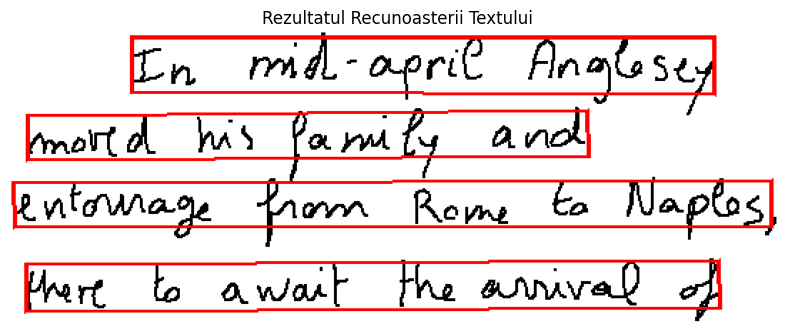


Rezultatul Complet: 
In mid-april Anglesey
moved his family and
entourage from Rome to Naples,
there to a wait the arrival of

--------------------------------------------------


In [14]:
def post_process_romanian(text):
    
    corrections = {
        'Lucces': 'Succes',
        'Inteligenta': 'Inteligență',
        'Artificialà': 'Artificială'
    }

    for incorrect, correct in corrections.items():
        text = text.replace(incorrect, correct)

    return text


def recognize_text(image_path):
    print(f"Se recunoaste textul din imaginea: {image_path}")

    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    image_stream = BytesIO(image_data)

    recognize_results = computervision_client.read_in_stream(
        image=image_stream,
        raw=True
    )

    operation_location = recognize_results.headers["Operation-Location"]
    operation_id = operation_location.split("/")[-1]

    while True:
        results = computervision_client.get_read_result(operation_id)
        if results.status not in [OperationStatusCodes.running, OperationStatusCodes.not_started]:
            break
        print("Recunoasterea completa a textului in proces ... ")
        time.sleep(1)

    if results.status == OperationStatusCodes.succeeded:
        print("\nOperatie Efectuata cu Succes!")

        img = Image.open(image_path)

        draw_img = img
        draw = ImageDraw.Draw(draw_img)

        all_text = ""
        for read_result in results.analyze_result.read_results:
            for line in read_result.lines:
                
                corrected_text = post_process_romanian(line.text)
                print(f"Line text: {corrected_text}")
                all_text += corrected_text + "\n"

                try:
                    if hasattr(line.bounding_box[0], 'x') and hasattr(line.bounding_box[0], 'y'):
                        points = [(p.x, p.y) for p in line.bounding_box]
                    else:
                        points = []
                        for i in range(0, len(line.bounding_box), 2):
                            if i + 1 < len(line.bounding_box):
                                points.append((line.bounding_box[i], line.bounding_box[i + 1]))

                    if points:
                        draw.polygon(points, outline='red', width=3)
                except Exception as e:
                    print(f"Atentie: Nu sa putut crea un bounding box : {e}")

                for word in line.words:
                    try:
                        confidence = word.confidence
                        print(f" Word: {word.text} (Confidence: {confidence: .2f})")
                    except AttributeError:
                        print(f" Word: {word.text} (Confidence: N/A")

        plt.figure(figsize=(10, 10))
        plt.imshow(draw_img)
        plt.axis('off')
        plt.title("Rezultatul Recunoasterii Textului")
        plt.show()

        return all_text
    else:
        print(f"Recunoasterea Textului a esuat cu statusul : {results.status}")
        return None


image_paths = ["images/test1.png", "images/bad_writing.png"]
for image_path in image_paths:
    recognized_text = recognize_text(image_path)
    print(f"\nRezultatul Complet: \n{recognized_text}")
    print("-" * 50)



Processing image: images/something.jpg
Waiting for text recognition to complete...

Text recognition succeeded:
Line: the quick brown fox Jumps over the lazy dog
  Word: the (Confidence: 0.98)
  Word: quick (Confidence: 0.71)
  Word: brown (Confidence: 0.64)
  Word: fox (Confidence: 0.81)
  Word: Jumps (Confidence: 0.96)
  Word: over (Confidence: 0.94)
  Word: the (Confidence: 0.96)
  Word: dog (Confidence: 0.56)
Line: the quick brown fox jumps over the lazy dog
  Word: the (Confidence: 0.75)
  Word: brown (Confidence: 0.98)
  Word: fox (Confidence: 0.66)
  Word: jumps (Confidence: 0.75)
  Word: over (Confidence: 0.91)
  Word: the (Confidence: 0.91)
  Word: lazy (Confidence: 0.61)
  Word: dog (Confidence: 0.74)
Line: The wien brown fox jumps over the lazy dog
  Word: The (Confidence: 0.62)
  Word: wien (Confidence: 0.59)
  Word: brown (Confidence: 1.00)
  Word: fox (Confidence: 0.73)
  Word: jumps (Confidence: 0.82)
  Word: over (Confidence: 0.75)
  Word: the (Confidence: 0.99)
  Word:

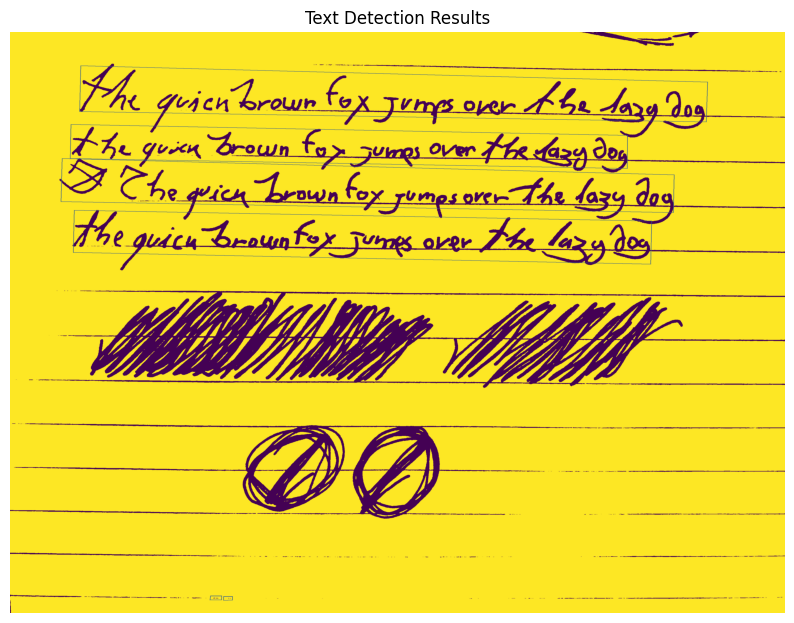


Full recognized text:
 the quick brown fox Jumps over the lazy dog
the quick brown fox jumps over the lazy dog
The wien brown fox jumps over the lazy dog
the quick brown fox Jumps over the lazy dog
--
.--

--------------------------------------------------


In [18]:
import cv2
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import Levenshtein


def preprocess_image(image_path):
    if not os.path.exists('processed_images'):
        os.makedirs('processed_images')

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    _, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    out_path = os.path.join('processed_images', os.path.basename(image_path))
    cv2.imwrite(out_path, img_bin)
    return out_path


def post_process_levenshtein(text):
   
    corrections = {
        'Lucces': 'Succes',
        'Inteligenta': 'Inteligență',
        'Artificialà': 'Artificială',
        'resolvarea': 'rezolvarea'
    }

    def correct_levenshtein(word):
        closest_match = min(corrections.keys(), key=lambda k: Levenshtein.distance(word, k))
        if Levenshtein.distance(word, closest_match) <= 1:
            return corrections[closest_match]
        return word

    words = text.split()
    corrected_words = [correct_levenshtein(word) for word in words]
    return " ".join(corrected_words)


def recognize_handwritten_text(image_path):
    
    print(f"Se proceseaza imaginea: {image_path}")

    processed_image = preprocess_image(image_path)

    with open(processed_image, "rb") as image_file:
        image_data = image_file.read()

    image_stream = BytesIO(image_data)

    recognize_results = computervision_client.read_in_stream(image=image_stream, raw=True)
    operation_location = recognize_results.headers["Operation-Location"]
    operation_id = operation_location.split("/")[-1]

    while True:
        results = computervision_client.get_read_result(operation_id)
        if results.status not in [OperationStatusCodes.running, OperationStatusCodes.not_started]:
            break
        print("Recunoasterea completa a textului in proces ... ")
        time.sleep(1)

    if results.status == OperationStatusCodes.succeeded:
        print("\nProcesul de recunoastere a texutlui :")

        img = Image.open(processed_image)
        draw_img = img.copy()
        draw = ImageDraw.Draw(draw_img)

        all_text = ""

        for read_result in results.analyze_result.read_results:
            for line in read_result.lines:
                corrected_text = post_process_levenshtein(line.text)
                print(f"Line: {corrected_text}")

                all_text += corrected_text + "\n"

                try:
                    points = [(line.bounding_box[i], line.bounding_box[i + 1]) for i in
                              range(0, len(line.bounding_box), 2)]
                    if points:
                        draw.polygon(points, outline='red', width=3)
                except Exception as e:
                    print(f"Atentie: nu se poate crea un boinding box {e}")

                for word in line.words:
                    if word.confidence < 0.50:
                        continue
                    print(f"  Word: {word.text} (Confidence: {word.confidence:.2f})")

        plt.figure(figsize=(10, 10))
        plt.imshow(draw_img)
        plt.axis('off')
        plt.title("Rezultatele detectarii textului")
        plt.show()


        return all_text
    else:
        print(f"Recunoasterea textului a esuat cu statusul: {results.status}")
        return None



image_path = "images/something.jpg"
recognized_text = recognize_handwritten_text(image_path)
print("\nRezultatul Complet:\n", recognized_text)
print("-" * 50)
